# Implementation of  K Means Clustering Algorithm with Smart Initialization  (k-means++)

In [105]:
#Author: Swapnil Acharya
#Date: 11/03/2020

In [106]:
#Import Required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import random

In [107]:
#read data from file
bm_df = pd.read_csv("buddymove.csv")

In [108]:
#view info of read file
bm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User Id    249 non-null    object
 1   Sports     249 non-null    int64 
 2   Religious  249 non-null    int64 
 3   Nature     249 non-null    int64 
 4   Theatre    249 non-null    int64 
 5   Shopping   249 non-null    int64 
 6   Picnic     249 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.7+ KB


In [109]:
#view features of read file
bm_df.columns

Index(['User Id', 'Sports', 'Religious', 'Nature', 'Theatre', 'Shopping',
       'Picnic'],
      dtype='object')

In [110]:
bm_df

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86
...,...,...,...,...,...,...,...
244,User 245,18,139,148,129,129,168
245,User 246,22,114,228,104,84,168
246,User 247,20,124,178,104,158,174
247,User 248,20,133,149,139,144,213


In [111]:
bm_df = bm_df.drop("User Id",1)
bm_df

,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,2,77,79,69,68,95
1,2,62,76,76,69,68
2,2,50,97,87,50,75
3,2,68,77,95,76,61
4,2,98,54,59,95,86
...,...,...,...,...,...,...
244,18,139,148,129,129,168
245,22,114,228,104,84,168
246,20,124,178,104,158,174
247,20,133,149,139,144,213


In [112]:
def get_cluster_labels(distances):
    """This function returns clusters labels for given distances from/to centroids
    
    Args:
        distances: A feature_count by clusters [n,k] matrix, containing distances from fro given centroid k
    
    Returns:
        clusters_labels: A n*1 matrix containing the index of the minimum distance
    """
    cluster_labels = np.argmin(distances,axis=1)
    return cluster_labels

In [113]:
def revise_cluster_centers(datapoints,cluster_labels,k):
    centroids= np.zeros([k,datapoints.shape[1]])
    for i in range(0,k):
        dpoints = datapoints[cluster_labels==i]
        centroids[i,:] = np.mean(dpoints,axis=0)
    return centroids

In [114]:
def get_initial_centroids(features_matrix,k):
    rand_indexes = np.random.randint(features_matrix.shape[0],size=k)
    centroids = features_matrix[rand_indexes]
    centroids.shape = (k,features_matrix.shape[1])
    return centroids

In [115]:
def k_means(features_matrix,k,max_iter,gain_threshold = 10e8,verbose=True):
    
    centroids = get_initial_centroids(features_matrix,k)
    
    if verbose:
        print("Initial Centroids Are: ", centroids)
        print("Initial Centroids Shape: ",centroids.shape)
        print("\n")
        
    distances = np.zeros((features_matrix.shape[0],k),float)
    print("Distances: " ,distances.shape)
    
    for i in range(0,max_iter):
        
        for j in range(0,k):
            distances[:,j] = np.linalg.norm((centroids[j,:]-features_matrix),axis=1)
            #print(centroids[j,:])
            #x = np.linalg.norm((centroids[j,:]-features_matrix),axis=1)
            #print(x.shape)
            #break
            
        #print(x.shape)
        #break
            #print(x.shape)
        #print(distances.shape)
        
        cluster_labels = get_cluster_labels(distances) 

        
        centroids = revise_cluster_centers(features_matrix,cluster_labels,k)
    
        if verbose:
            print(" Iteration: ",i, "\n Revised Centroids: \n",centroids)
            print("\n")
            
    return cluster_labels, centroids

In [116]:
def transform_nD_to_2D(features_matrix):
    pca = PCA(n_components = 2)# Number of components to keep
    features_matrix_pca = pca.fit_transform(features_matrix)
    return features_matrix_pca

In [117]:
features_matrix = bm_df.to_numpy()

In [118]:
features_matrix = transform_nD_to_2D(features_matrix)

LinAlgError: SVD did not converge

In [ ]:
cluster_labels, centroids = k_means(features_matrix, k = 2, max_iter=9000,verbose=False)
print("Cluster Labels: ", cluster_labels)
print("Centroids", centroids)

In [119]:
centroids.shape

(2, 2)

In [120]:
def visualize_k_means_clustering(features_matrix,centroids,cluster_labels,k):
    fig, ax = plt.subplots()
    for i in range(0,k):
        dpoints = features_matrix[cluster_labels==i]
        ax.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50)
        ax.scatter(centroids[i,0],centroids[i,1],marker="o",s=100) #plot points
        
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Clusters and Centroids")

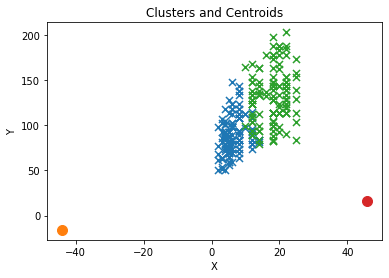

In [121]:
visualize_k_means_clustering(features_matrix,centroids,cluster_labels,k=2)

In [146]:
class Kmeans():
    """This class implements Kmeans ++ algorithms for clustering.
    
    This class implements Kmeans ++ algorithms for clustering.This
    reduces data to 2D then applies k_means ++ algorithm.
    """
    
    def __init__(self,num_clusters = 2,max_iter=500):
        """This class method initializes K means clustering algorith and is the default constructor.
        
        Args:
            num_clusters(int): A value specified the numbers of clusters for this model
        
        Returns:
            None
        """
        self.__centroids = None #centroids for fitted cluster
        self.__k = num_clusters #THe numbers of clusters
        self.__iterations = max_iter #the number of iterations
        
    def get_centroids(self):
        """This class methods returns centroids for this K means model
        
        Args:
            None
            
        Returns:
            centroids(numpy.array): Centroids for K means model
        """
        return self.__centroids
    
    
    def __get_initial_centroids(self,features_matrix):
        """This class methods initializes centroids.
        
        This class methods initializes centroids by random selecting one of the points from 
        given features matrix.
        
        Args:
            features_matrix(numpy.array): A numpy array containing examples by features  [n,m].
            k
        """
        rand_indexes = np.random.randint(features_matrix.shape[0],size=self.__k) #get random indexes
        self.__centroids = features_matrix[rand_indexes] #get centroids from data points with the randomly generated index
        self.__centroids.shape = (self.__k,features_matrix.shape[1]) #reshape centroids
        
        
    def __revise_cluster_centers(self,features_matrix,cluster_labels):
        """This class method updates the centroids.
        
        THis clas methods updates the centroids by caculating mean for given cluster labels and features_matrix.
        
        Args:
            features_matrix(numpy.array): This the trainning data point with examples X features [n,m].
            cluster_labels(numpy.array): An array with previous cluster labels, [n]
            
        Returns:
            None
        """
        for i in range(0,self.__k):
            dpoints = features_matrix[cluster_labels==i] #get datapoints for given labels
            self.__centroids[i,:] = np.mean(dpoints,axis=0) #calulate mean and update centroids
            
    
    def fit(self,features_matrix,verbose=False):
        """This class methods trains the K means model.
        
        Args:
            features_matrix(numpy.array): This the trainning data point with examples X features [n,m].
            verbose(boolean): A flag indicating whter moddel fitting process messages should be printed or not
        """
        self.__get_initial_centroids(features_matrix) #get initial centroids

        if verbose:
            print("Initial Centroids Are: ", self.__centroids)#print centroids
        
        distances = np.zeros((features_matrix.shape[0],self.__k),float)

        for i in range(0,self.__iterations): #loop for specified itertations

            for j in range(0,self.__k): #compute disances to all centroids
                distances[:,j] = np.linalg.norm((self.__centroids[j,:]-features_matrix),axis=1)
                
            cluster_labels = np.argmin(distances,axis=1) #get cluster labels
         
            self.__revise_cluster_centers(features_matrix,cluster_labels)  #revise cluster labels
            
            if verbose: #print centroids
                print(" Iteration: ",i, "Revised Centroids: \n",self.__centroids)
    
    
    def predict_labels(self,features_matrix):
        """This class methods predicts labels for given features_matrix
        
        Args:
            features_matrix(numpy.array): This the data point with examples X features [n,m] whose label is to be predicited.
        """
        distances = np.zeros((features_matrix.shape[0],self.__k),float)
        for j in range(0,self.__k): #compute disances to all centroids
            distances[:,j] = np.linalg.norm((self.__centroids[j,:]-features_matrix),axis=1)
        cluster_labels = np.argmin(distances,axis=1) #get cluster labels
        return cluster_labels

In [156]:
def visualize_k_means_clustering(features_matrix,centroids,cluster_labels,k):
    """This is a helper method that visualizes K means clusters

    Args:
        features_matrix(numpy.array): This the data point with examples X features [n,m].
        centroids(numpy.array): centroids of k means clustering
        cluster_labels(numpy.array): predicted cluster labels for given features_matrix
        k(int): the numbers of clusters
    """
    fig, ax = plt.subplots()
    for i in range(0,k):
        dpoints = features_matrix[cluster_labels==i]
        ax.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50)
        ax.scatter(centroids[i,0],centroids[i,1],marker="o",s=100) #plot points

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Clusters and Centroids")

In [157]:
model = Kmeans(num_clusters=2,max_iter=100)

In [158]:
features_matrix = bm_df.to_numpy()

In [159]:
pca = PCA(n_components = 2)# Number of components to keep
features_matrix = pca.fit_transform(features_matrix)

In [160]:
model.fit(features_matrix)

In [161]:
centroids = model.get_centroids()

In [162]:
cluster_labels = model.predict_labels(features_matrix)

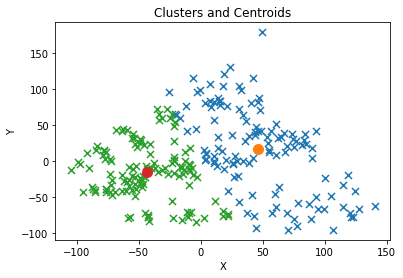

In [163]:
visualize_k_means_clustering(features_matrix,centroids,cluster_labels,k=2)

# Visualize for different clusters

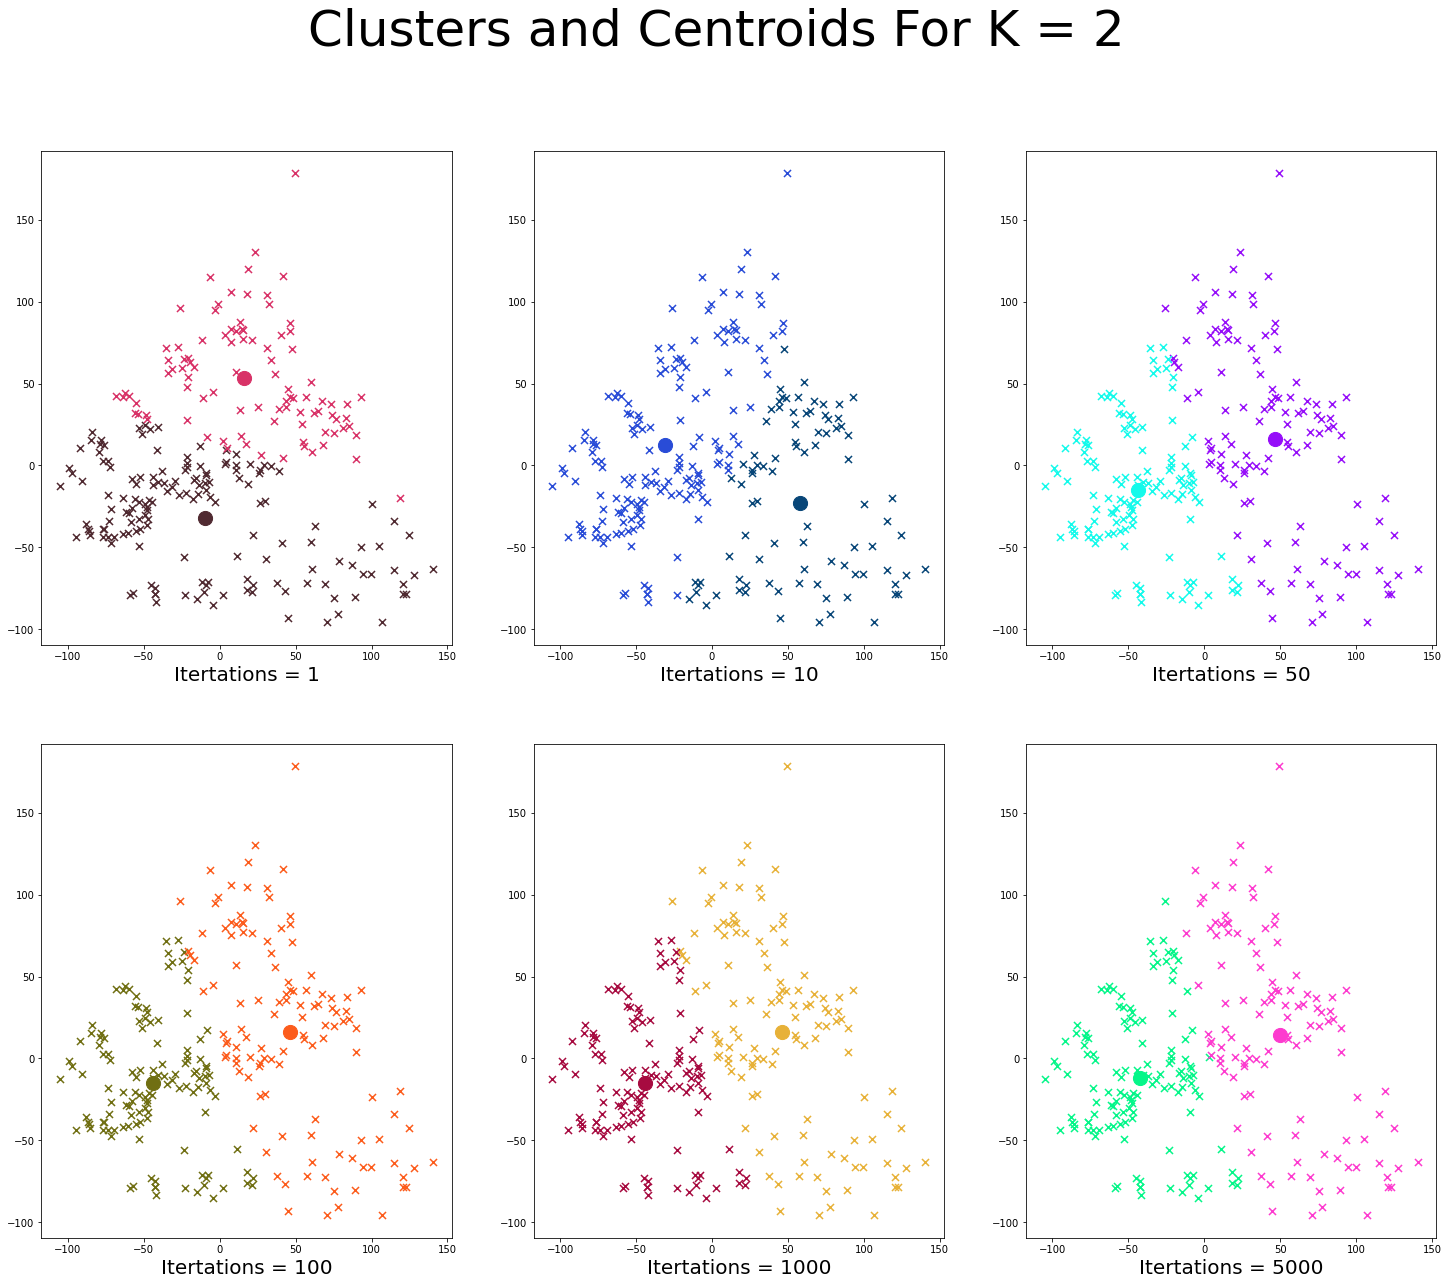

In [222]:
features_matrix = bm_df.to_numpy()
pca = PCA(n_components = 2)# Number of components to keep
features_matrix = pca.fit_transform(features_matrix)
fig, ax = plt.subplots(2,3,figsize=(25,20))
iterations_list = [1,10,50,100,1000,5000]
k = 2
for n_iter,axi in zip(iterations_list,ax.flatten()):
    model = Kmeans(num_clusters=k,max_iter=n_iter)
    model.fit(features_matrix)
    centroids = model.get_centroids()
    cluster_labels = model.predict_labels(features_matrix)
    for j in range(0,k):
        color = np.random.rand(3,)
        dpoints = features_matrix[cluster_labels==j]
        axi.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50,c=color.reshape(1,-1))
        axi.scatter(centroids[j,0],centroids[j,1],marker="o",s=200,c=color.reshape(1,-1)) #plot points
        axi.set_xlabel("Itertations = " + str(n_iter),size=20)
    fig.suptitle("Clusters and Centroids For K = " + str(k) ,size=50)  

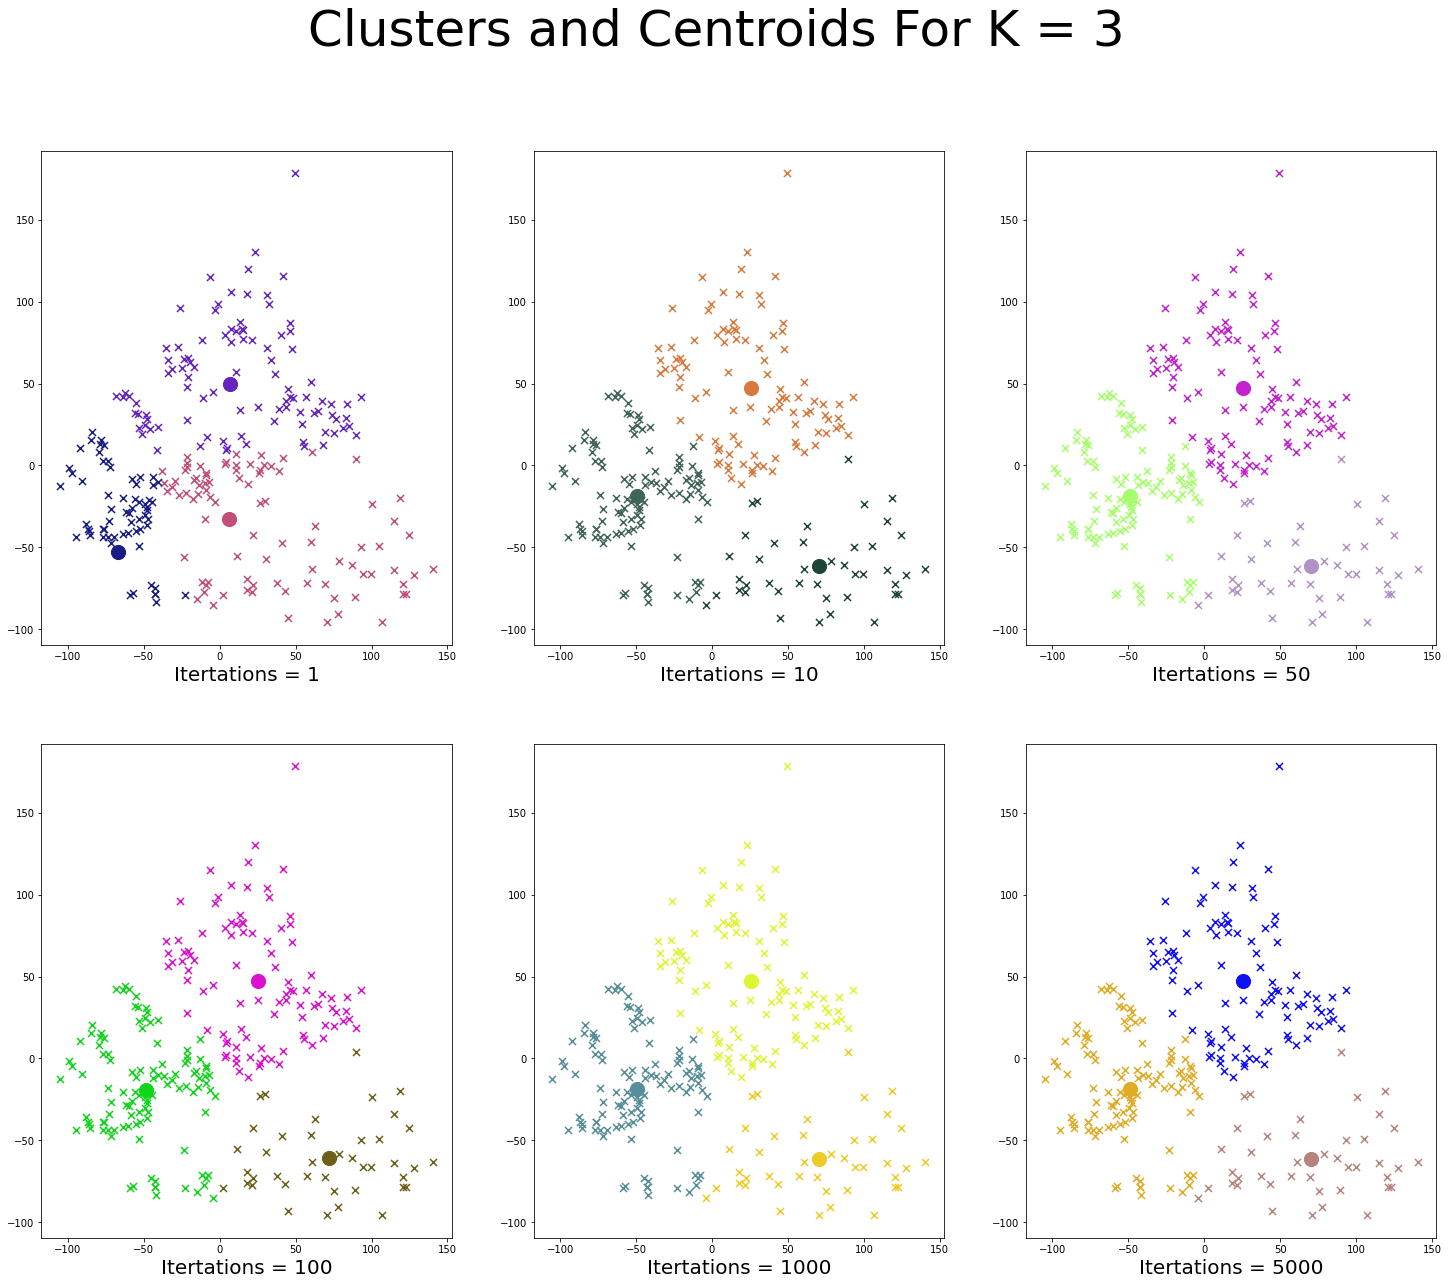

In [223]:
features_matrix = bm_df.to_numpy()
pca = PCA(n_components = 2)# Number of components to keep
features_matrix = pca.fit_transform(features_matrix)
fig, ax = plt.subplots(2,3,figsize=(25,20))
iterations_list = [1,10,50,100,1000,5000]
k = 3
for n_iter,axi in zip(iterations_list,ax.flatten()):
    model = Kmeans(num_clusters=k,max_iter=n_iter)
    model.fit(features_matrix)
    centroids = model.get_centroids()
    cluster_labels = model.predict_labels(features_matrix)
    for j in range(0,k):
        color = np.random.rand(3,)
        dpoints = features_matrix[cluster_labels==j]
        axi.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50,c=color.reshape(1,-1))
        axi.scatter(centroids[j,0],centroids[j,1],marker="o",s=200,c=color.reshape(1,-1)) #plot points
        axi.set_xlabel("Itertations = " + str(n_iter),size=20)
    fig.suptitle("Clusters and Centroids For K = " + str(k) ,size=50)  

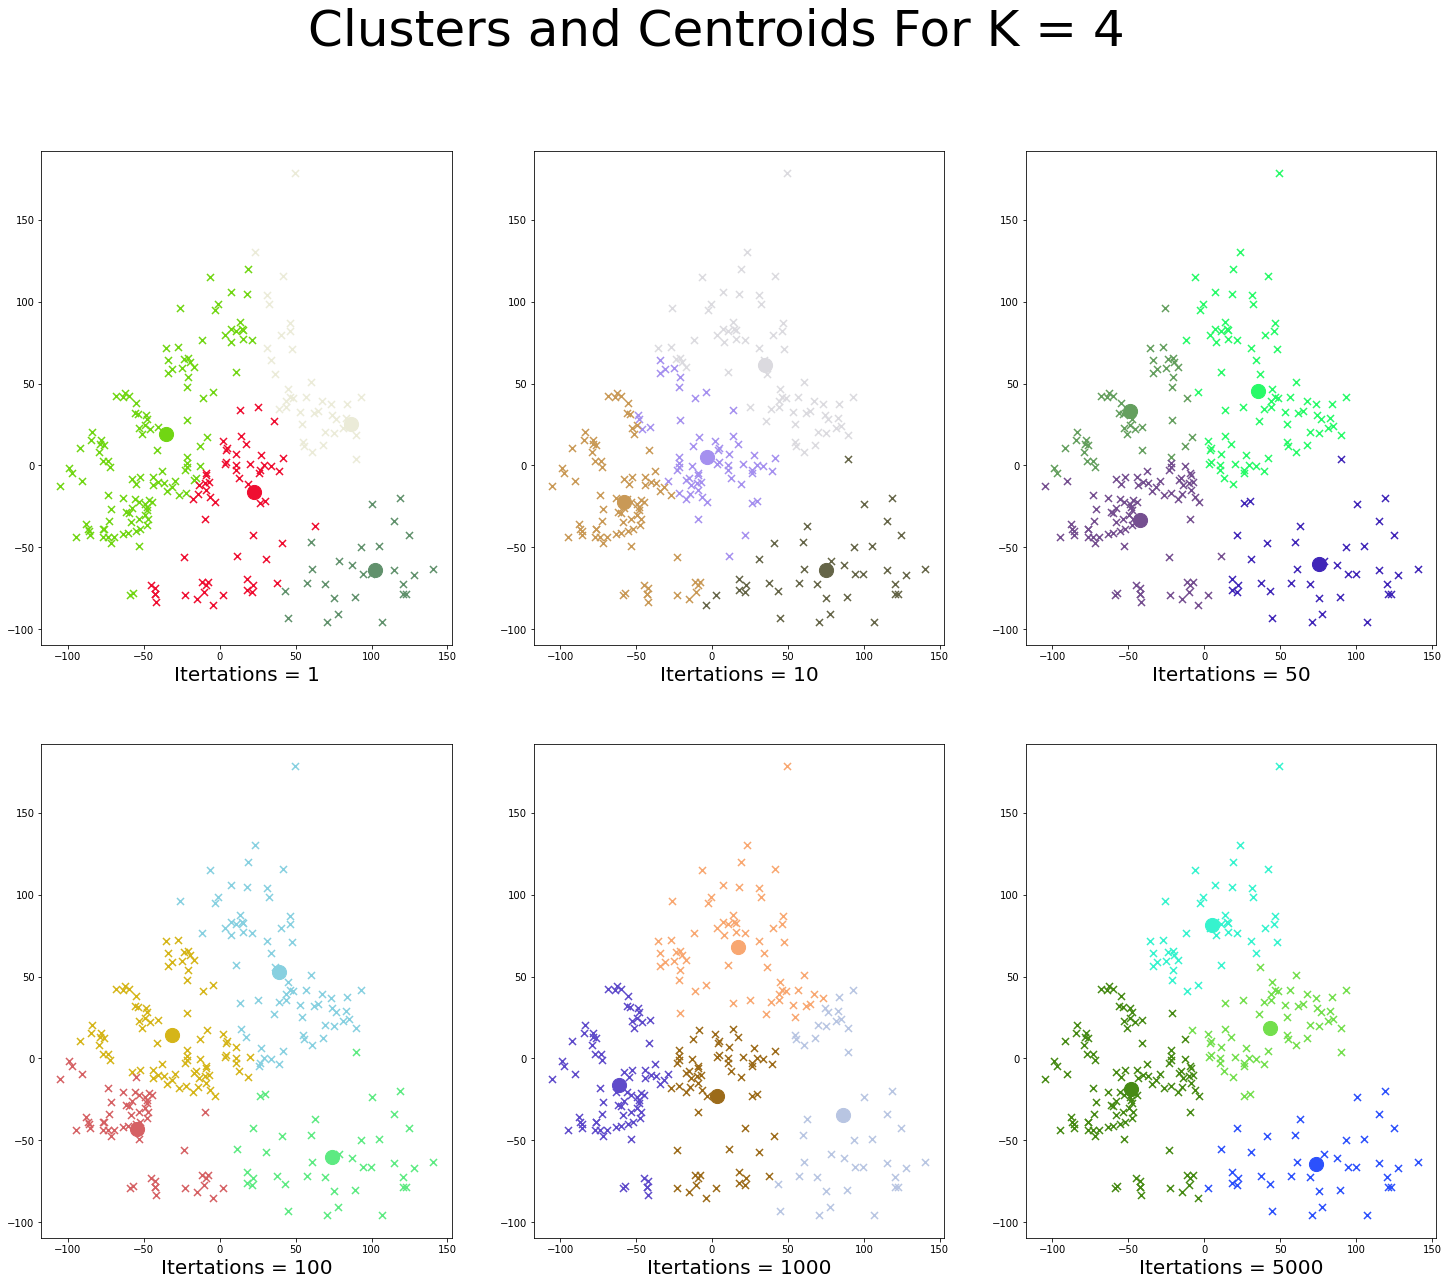

In [224]:
features_matrix = bm_df.to_numpy()
pca = PCA(n_components = 2)# Number of components to keep
features_matrix = pca.fit_transform(features_matrix)
fig, ax = plt.subplots(2,3,figsize=(25,20))
iterations_list = [1,10,50,100,1000,5000]
k = 4
for n_iter,axi in zip(iterations_list,ax.flatten()):
    model = Kmeans(num_clusters=k,max_iter=n_iter)
    model.fit(features_matrix)
    centroids = model.get_centroids()
    cluster_labels = model.predict_labels(features_matrix)
    for j in range(0,k):
        color = np.random.rand(3,)
        dpoints = features_matrix[cluster_labels==j]
        axi.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50,c=color.reshape(1,-1))
        axi.scatter(centroids[j,0],centroids[j,1],marker="o",s=200,c=color.reshape(1,-1)) #plot points
        axi.set_xlabel("Itertations = " + str(n_iter),size=20)
    fig.suptitle("Clusters and Centroids For K = " + str(k) ,size=50)  

D:\ProgramFiles\anaconda3\envs\asl_venv\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\ProgramFiles\anaconda3\envs\asl_venv\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


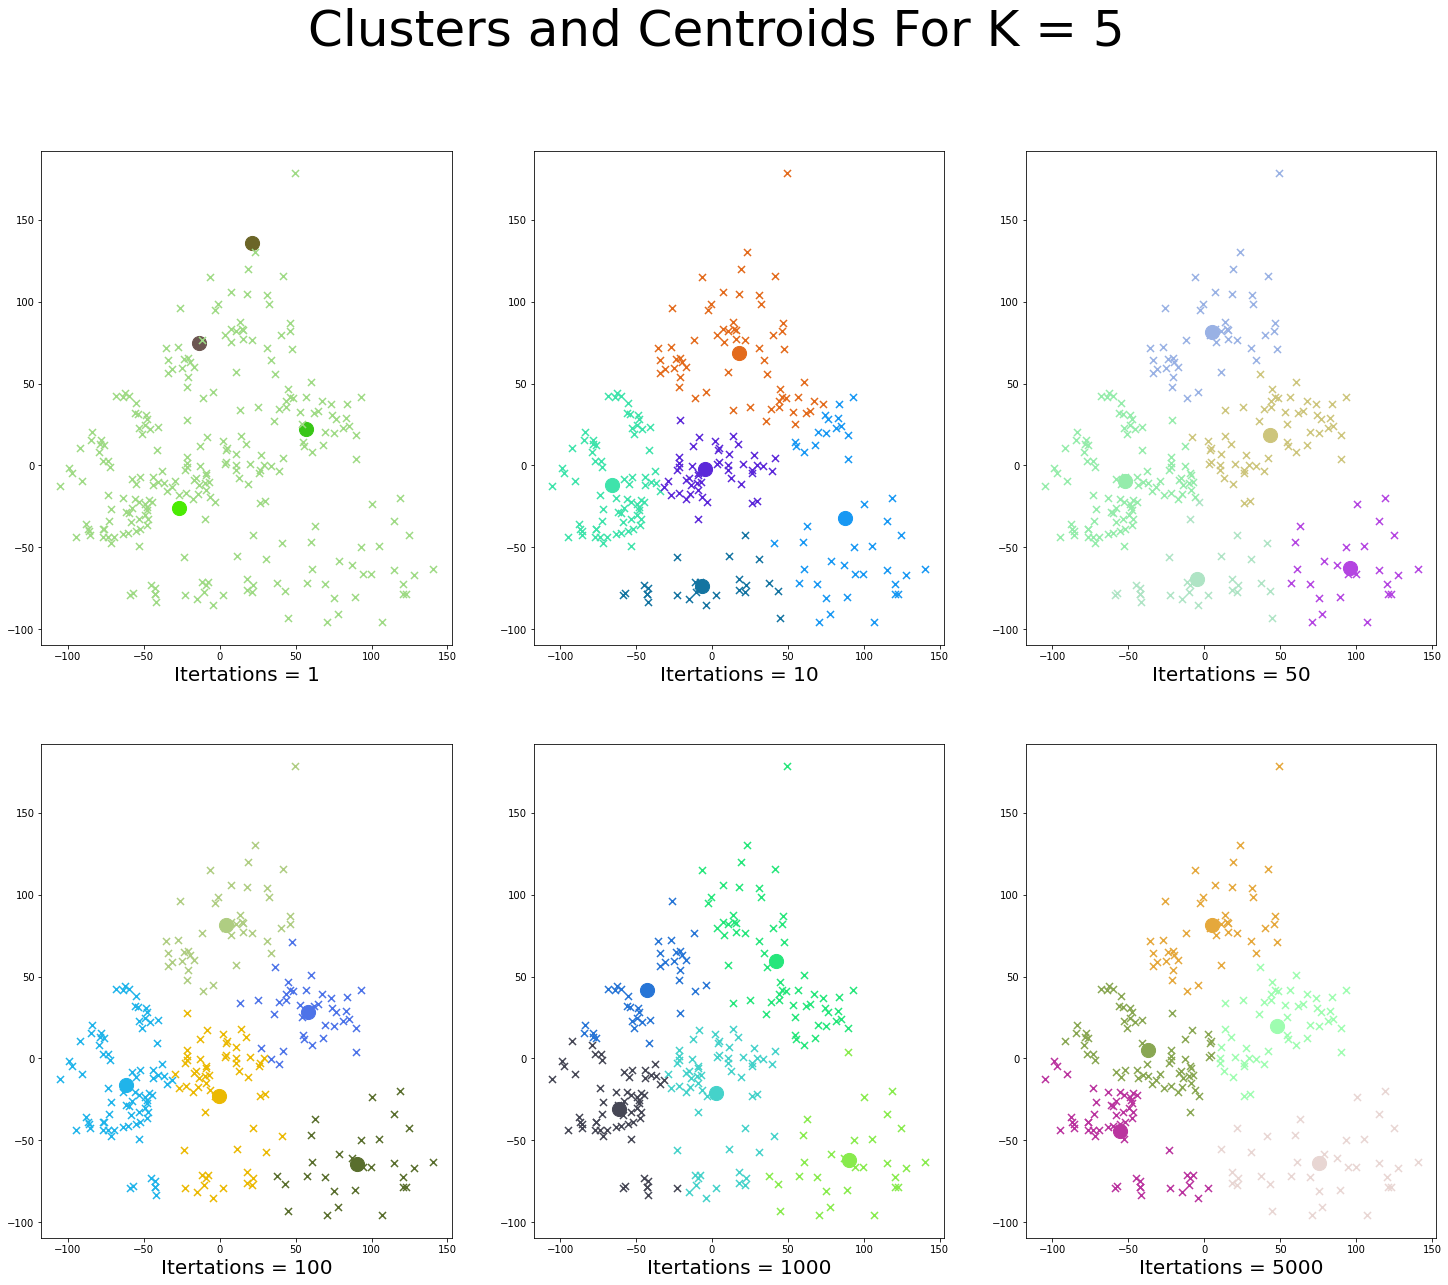

In [226]:
features_matrix = bm_df.to_numpy()
pca = PCA(n_components = 2)# Number of components to keep
features_matrix = pca.fit_transform(features_matrix)
fig, ax = plt.subplots(2,3,figsize=(25,20))
iterations_list = [1,10,50,100,1000,5000]
k = 5
for n_iter,axi in zip(iterations_list,ax.flatten()):
    model = Kmeans(num_clusters=k,max_iter=n_iter)
    model.fit(features_matrix)
    centroids = model.get_centroids()
    cluster_labels = model.predict_labels(features_matrix)
    for j in range(0,k):
        color = np.random.rand(3,)
        dpoints = features_matrix[cluster_labels==j]
        axi.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50,c=color.reshape(1,-1))
        axi.scatter(centroids[j,0],centroids[j,1],marker="o",s=200,c=color.reshape(1,-1)) #plot points
        axi.set_xlabel("Itertations = " + str(n_iter),size=20)
    fig.suptitle("Clusters and Centroids For K = " + str(k) ,size=50)  

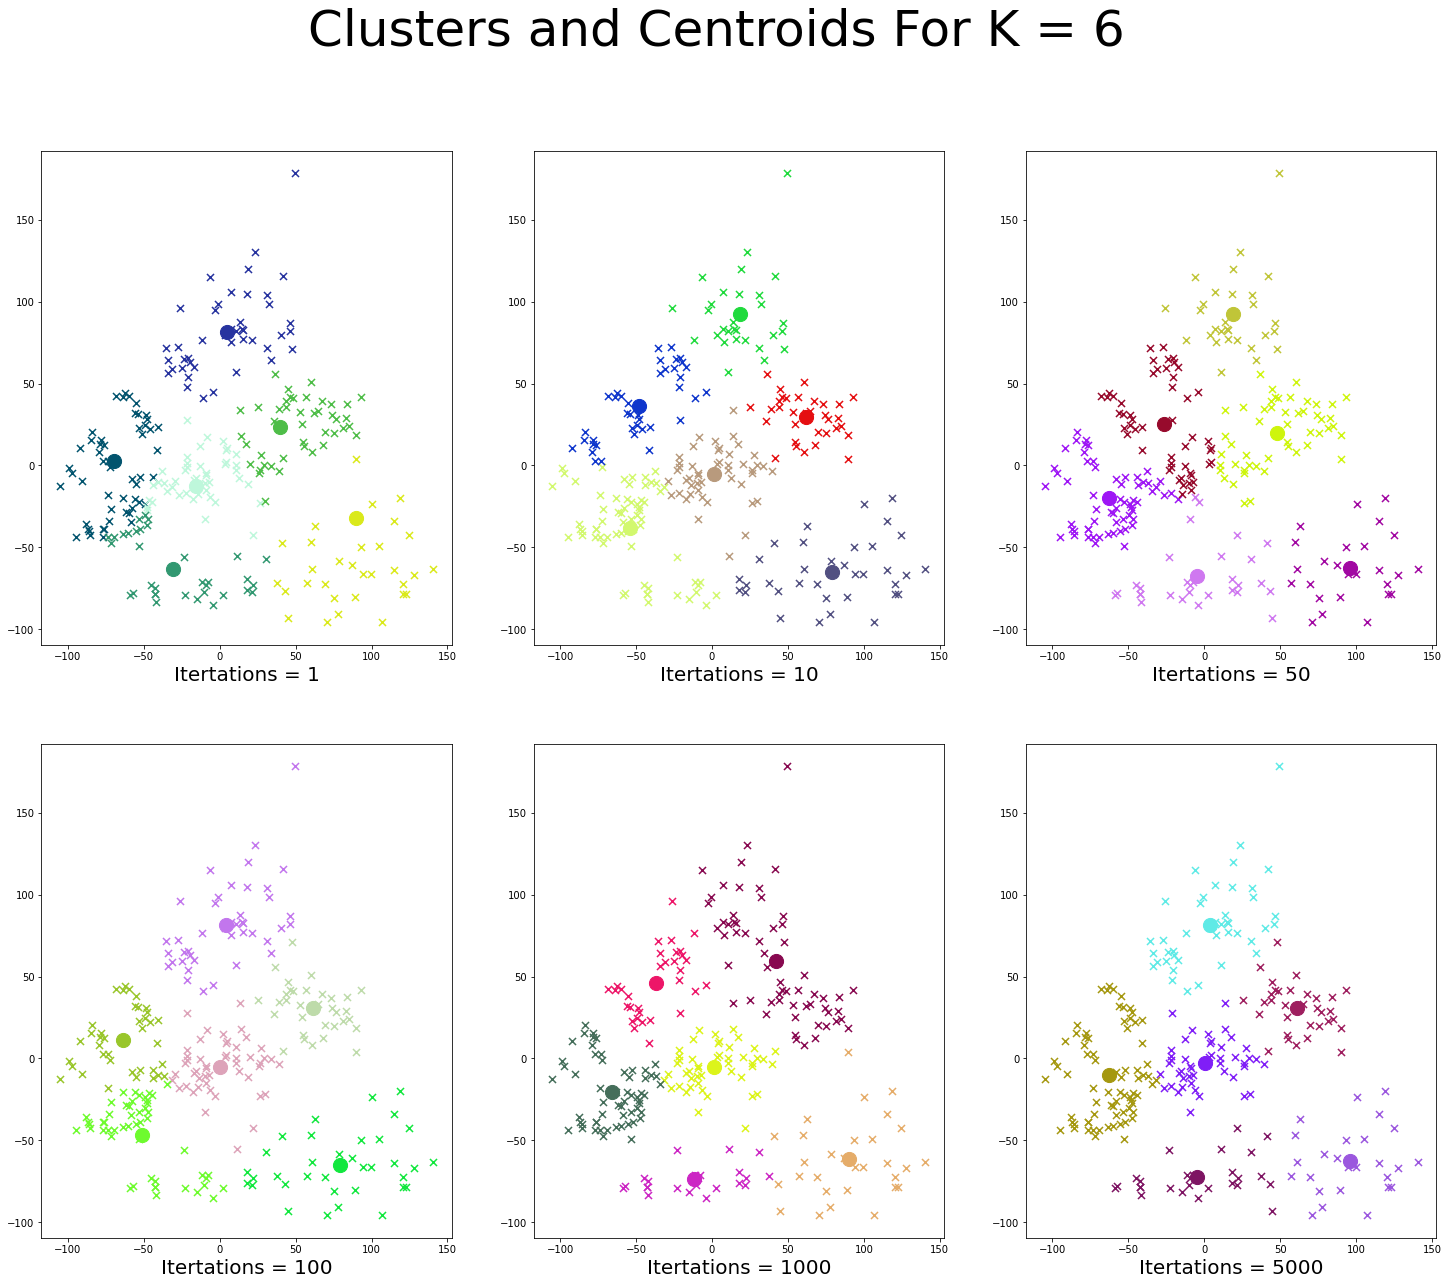

In [227]:
features_matrix = bm_df.to_numpy()
pca = PCA(n_components = 2)# Number of components to keep
features_matrix = pca.fit_transform(features_matrix)
fig, ax = plt.subplots(2,3,figsize=(25,20))
iterations_list = [1,10,50,100,1000,5000]
k = 6
for n_iter,axi in zip(iterations_list,ax.flatten()):
    model = Kmeans(num_clusters=k,max_iter=n_iter)
    model.fit(features_matrix)
    centroids = model.get_centroids()
    cluster_labels = model.predict_labels(features_matrix)
    for j in range(0,k):
        color = np.random.rand(3,)
        dpoints = features_matrix[cluster_labels==j]
        axi.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50,c=color.reshape(1,-1))
        axi.scatter(centroids[j,0],centroids[j,1],marker="o",s=200,c=color.reshape(1,-1)) #plot points
        axi.set_xlabel("Itertations = " + str(n_iter),size=20)
    fig.suptitle("Clusters and Centroids For K = " + str(k) ,size=50)  